In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('academic_data.csv')

test = pd.read_csv('test.csv')
test.drop(columns=['id'],inplace =True)


x = train.drop(columns=['Target'],axis=1)
y = train['Target']

(51012, 36)

In [14]:
def correlation(train, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
correlation(train,0.75)

{'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 "Father's occupation",
 'International'}

In [17]:
corr_features = correlation(test, 0.75)
len(set(corr_features))

8

In [18]:
train.drop(corr_features,axis=1,inplace=True)

In [19]:
correlation(test,0.75)

{'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 "Father's occupation",
 'International'}

In [20]:
corr_features= correlation(test,0.75)
len(corr_features)

8

In [21]:
test.drop(corr_features,axis=1,inplace=True)

In [22]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,6,6,0,0,11.1,0.6,2.02,1
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,8,4,0,0,11.1,0.6,2.02,2
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0,0,16.2,0.3,-0.92,2
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,7,9,7,0,0,11.1,0.6,2.02,3
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,0,0,7.6,2.6,0.32,1


In [23]:
test.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9500,1,1,141.0,1,3,1,...,18,0,7,0,0,0,0,13.9,-0.3,0.79
1,1,1,1,9238,1,1,128.0,1,1,19,...,19,0,6,7,6,0,0,11.1,0.6,2.02
2,1,1,1,9238,1,1,118.0,1,1,19,...,18,0,6,11,6,0,0,15.5,2.8,-4.06
3,1,44,1,9147,1,39,130.0,1,1,19,...,23,2,6,15,5,0,0,8.9,1.4,3.51
4,1,39,1,9670,1,1,110.0,1,1,37,...,26,0,6,9,3,0,2,7.6,2.6,0.32


In [24]:
x= train.drop(columns=['Target'],axis=1)
y= train['Target']

In [89]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,MaxAbsScaler,StandardScaler

In [105]:
scaler_x = StandardScaler()
x_scal = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y_scal = scaler_y.fit_transform(y.values.reshape(-1, 1))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [99]:
x_scal

array([[-0.25343684, -0.90242254, -0.52406561, ..., -0.15841825,
        -0.44910992,  0.93317583],
       [-0.25343684,  0.05668196, -0.52406561, ..., -0.15841825,
        -0.44910992,  0.93317583],
       [-0.25343684,  0.05668196,  0.28918253, ...,  1.7636745 ,
        -0.66357837, -0.37269756],
       ...,
       [ 8.80317976,  0.05668196, -0.52406561, ..., -0.79911583,
        -1.44996265, -1.34988173],
       [-0.25343684, -0.90242254,  1.10243066, ..., -1.47750151,
         0.98067968,  0.17807897],
       [-0.25343684, -0.90242254, -0.52406561, ...,  1.49985785,
         1.12365864, -1.76740587]])

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [101]:
cat = CatBoostClassifier()
cat.fit(x_scal,y)
cat.predict(test)

Learning rate set to 0.098718
0:	learn: 1.0028285	total: 43.1ms	remaining: 43.1s
1:	learn: 0.9293461	total: 82ms	remaining: 40.9s
2:	learn: 0.8714982	total: 118ms	remaining: 39.2s
3:	learn: 0.8240459	total: 151ms	remaining: 37.7s
4:	learn: 0.7839509	total: 186ms	remaining: 37s
5:	learn: 0.7516326	total: 226ms	remaining: 37.4s
6:	learn: 0.7236190	total: 261ms	remaining: 37s
7:	learn: 0.6998522	total: 295ms	remaining: 36.6s
8:	learn: 0.6799290	total: 329ms	remaining: 36.2s
9:	learn: 0.6626047	total: 364ms	remaining: 36s
10:	learn: 0.6472622	total: 400ms	remaining: 36s
11:	learn: 0.6346202	total: 437ms	remaining: 36s
12:	learn: 0.6234209	total: 469ms	remaining: 35.6s
13:	learn: 0.6138513	total: 502ms	remaining: 35.3s
14:	learn: 0.6048876	total: 535ms	remaining: 35.1s
15:	learn: 0.5973909	total: 568ms	remaining: 34.9s
16:	learn: 0.5902957	total: 600ms	remaining: 34.7s
17:	learn: 0.5840489	total: 639ms	remaining: 34.8s
18:	learn: 0.5781293	total: 675ms	remaining: 34.8s
19:	learn: 0.5733447	

167:	learn: 0.4940009	total: 5.26s	remaining: 26s
168:	learn: 0.4939245	total: 5.29s	remaining: 26s
169:	learn: 0.4936790	total: 5.32s	remaining: 26s
170:	learn: 0.4935144	total: 5.34s	remaining: 25.9s
171:	learn: 0.4933620	total: 5.37s	remaining: 25.8s
172:	learn: 0.4932516	total: 5.39s	remaining: 25.8s
173:	learn: 0.4930744	total: 5.42s	remaining: 25.7s
174:	learn: 0.4929371	total: 5.45s	remaining: 25.7s
175:	learn: 0.4927833	total: 5.47s	remaining: 25.6s
176:	learn: 0.4926901	total: 5.5s	remaining: 25.6s
177:	learn: 0.4925523	total: 5.53s	remaining: 25.5s
178:	learn: 0.4924188	total: 5.55s	remaining: 25.5s
179:	learn: 0.4923335	total: 5.58s	remaining: 25.4s
180:	learn: 0.4922414	total: 5.61s	remaining: 25.4s
181:	learn: 0.4921586	total: 5.63s	remaining: 25.3s
182:	learn: 0.4920445	total: 5.65s	remaining: 25.2s
183:	learn: 0.4918823	total: 5.68s	remaining: 25.2s
184:	learn: 0.4917241	total: 5.71s	remaining: 25.2s
185:	learn: 0.4915276	total: 5.74s	remaining: 25.1s
186:	learn: 0.49140

333:	learn: 0.4772703	total: 9.75s	remaining: 19.4s
334:	learn: 0.4771696	total: 9.78s	remaining: 19.4s
335:	learn: 0.4770916	total: 9.8s	remaining: 19.4s
336:	learn: 0.4770588	total: 9.83s	remaining: 19.3s
337:	learn: 0.4769914	total: 9.85s	remaining: 19.3s
338:	learn: 0.4769047	total: 9.88s	remaining: 19.3s
339:	learn: 0.4768175	total: 9.9s	remaining: 19.2s
340:	learn: 0.4767553	total: 9.93s	remaining: 19.2s
341:	learn: 0.4766346	total: 9.96s	remaining: 19.2s
342:	learn: 0.4765445	total: 9.98s	remaining: 19.1s
343:	learn: 0.4764328	total: 10s	remaining: 19.1s
344:	learn: 0.4764018	total: 10s	remaining: 19.1s
345:	learn: 0.4763523	total: 10.1s	remaining: 19s
346:	learn: 0.4762785	total: 10.1s	remaining: 19s
347:	learn: 0.4762003	total: 10.1s	remaining: 18.9s
348:	learn: 0.4760806	total: 10.1s	remaining: 18.9s
349:	learn: 0.4760126	total: 10.2s	remaining: 18.9s
350:	learn: 0.4758866	total: 10.2s	remaining: 18.8s
351:	learn: 0.4757506	total: 10.2s	remaining: 18.8s
352:	learn: 0.4756794	

496:	learn: 0.4659576	total: 14s	remaining: 14.2s
497:	learn: 0.4658940	total: 14s	remaining: 14.2s
498:	learn: 0.4658504	total: 14.1s	remaining: 14.1s
499:	learn: 0.4657816	total: 14.1s	remaining: 14.1s
500:	learn: 0.4657083	total: 14.1s	remaining: 14.1s
501:	learn: 0.4656574	total: 14.1s	remaining: 14s
502:	learn: 0.4656112	total: 14.2s	remaining: 14s
503:	learn: 0.4655510	total: 14.2s	remaining: 14s
504:	learn: 0.4654658	total: 14.2s	remaining: 13.9s
505:	learn: 0.4654149	total: 14.2s	remaining: 13.9s
506:	learn: 0.4653332	total: 14.3s	remaining: 13.9s
507:	learn: 0.4652888	total: 14.3s	remaining: 13.8s
508:	learn: 0.4652069	total: 14.3s	remaining: 13.8s
509:	learn: 0.4651510	total: 14.3s	remaining: 13.8s
510:	learn: 0.4650679	total: 14.4s	remaining: 13.8s
511:	learn: 0.4650113	total: 14.4s	remaining: 13.7s
512:	learn: 0.4649195	total: 14.4s	remaining: 13.7s
513:	learn: 0.4648181	total: 14.5s	remaining: 13.7s
514:	learn: 0.4647403	total: 14.5s	remaining: 13.6s
515:	learn: 0.4646761	

657:	learn: 0.4557211	total: 18.3s	remaining: 9.5s
658:	learn: 0.4556856	total: 18.3s	remaining: 9.47s
659:	learn: 0.4556457	total: 18.3s	remaining: 9.44s
660:	learn: 0.4555324	total: 18.4s	remaining: 9.42s
661:	learn: 0.4554709	total: 18.4s	remaining: 9.39s
662:	learn: 0.4554568	total: 18.4s	remaining: 9.36s
663:	learn: 0.4553950	total: 18.4s	remaining: 9.33s
664:	learn: 0.4553666	total: 18.5s	remaining: 9.3s
665:	learn: 0.4552794	total: 18.5s	remaining: 9.28s
666:	learn: 0.4552171	total: 18.5s	remaining: 9.25s
667:	learn: 0.4551461	total: 18.6s	remaining: 9.22s
668:	learn: 0.4551284	total: 18.6s	remaining: 9.19s
669:	learn: 0.4550801	total: 18.6s	remaining: 9.16s
670:	learn: 0.4550371	total: 18.6s	remaining: 9.14s
671:	learn: 0.4549986	total: 18.7s	remaining: 9.11s
672:	learn: 0.4549761	total: 18.7s	remaining: 9.08s
673:	learn: 0.4549394	total: 18.7s	remaining: 9.05s
674:	learn: 0.4548771	total: 18.7s	remaining: 9.02s
675:	learn: 0.4548379	total: 18.8s	remaining: 8.99s
676:	learn: 0.

817:	learn: 0.4468153	total: 23s	remaining: 5.13s
818:	learn: 0.4467922	total: 23.1s	remaining: 5.1s
819:	learn: 0.4467706	total: 23.1s	remaining: 5.07s
820:	learn: 0.4467130	total: 23.1s	remaining: 5.04s
821:	learn: 0.4466811	total: 23.2s	remaining: 5.01s
822:	learn: 0.4466044	total: 23.2s	remaining: 4.99s
823:	learn: 0.4465164	total: 23.2s	remaining: 4.96s
824:	learn: 0.4464899	total: 23.3s	remaining: 4.93s
825:	learn: 0.4464660	total: 23.3s	remaining: 4.91s
826:	learn: 0.4464161	total: 23.3s	remaining: 4.88s
827:	learn: 0.4463474	total: 23.4s	remaining: 4.85s
828:	learn: 0.4463017	total: 23.4s	remaining: 4.82s
829:	learn: 0.4462794	total: 23.4s	remaining: 4.79s
830:	learn: 0.4462094	total: 23.4s	remaining: 4.77s
831:	learn: 0.4461279	total: 23.5s	remaining: 4.74s
832:	learn: 0.4460673	total: 23.5s	remaining: 4.71s
833:	learn: 0.4459976	total: 23.5s	remaining: 4.68s
834:	learn: 0.4459735	total: 23.6s	remaining: 4.66s
835:	learn: 0.4459626	total: 23.6s	remaining: 4.63s
836:	learn: 0.4

978:	learn: 0.4385375	total: 27.6s	remaining: 592ms
979:	learn: 0.4385035	total: 27.6s	remaining: 564ms
980:	learn: 0.4384685	total: 27.6s	remaining: 535ms
981:	learn: 0.4383634	total: 27.7s	remaining: 507ms
982:	learn: 0.4383137	total: 27.7s	remaining: 479ms
983:	learn: 0.4382619	total: 27.7s	remaining: 451ms
984:	learn: 0.4382385	total: 27.7s	remaining: 423ms
985:	learn: 0.4382038	total: 27.8s	remaining: 394ms
986:	learn: 0.4381730	total: 27.8s	remaining: 366ms
987:	learn: 0.4381144	total: 27.8s	remaining: 338ms
988:	learn: 0.4380747	total: 27.9s	remaining: 310ms
989:	learn: 0.4380521	total: 27.9s	remaining: 282ms
990:	learn: 0.4380133	total: 27.9s	remaining: 253ms
991:	learn: 0.4379567	total: 27.9s	remaining: 225ms
992:	learn: 0.4379385	total: 28s	remaining: 197ms
993:	learn: 0.4378856	total: 28s	remaining: 169ms
994:	learn: 0.4378440	total: 28s	remaining: 141ms
995:	learn: 0.4377673	total: 28.1s	remaining: 113ms
996:	learn: 0.4377015	total: 28.1s	remaining: 84.5ms
997:	learn: 0.437

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [102]:
accuracy = cat.score(x,y)

In [103]:
accuracy*100

64.1221673331765

In [29]:
t = cat.predict(test)

In [30]:
t.shape

(51012, 1)

In [31]:
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(x,y)
light.predict(test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 742
[LightGBM] [Info] Number of data points in the train set: 76518, number of used features: 28
[LightGBM] [Info] Start training from score -0.746204
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633484


array([2, 1, 1, ..., 2, 2, 2], dtype=int64)

In [32]:
accuracy = light.score(x,y)
print(accuracy*100)
t = light.predict(test)
print(t.shape)

81.72325465903447
(51012,)


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
grad.fit(x,y)
grad.predict(test)

array([2, 1, 1, ..., 2, 2, 2], dtype=int64)

In [34]:
accuracy = grad.score(x,y)
print(accuracy*100)
t = grad.predict(test)
print(t.shape)

80.05305941085757
(51012,)


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [38]:
import time
from xgboost import XGBClassifier
start_time = time.time()
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(x.values, y)
# print('Fit time : ', time.time() - start_time)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
accuracy = xgb.score(x,y)
print(accuracy*100)
t = xgb.predict(test)
print(t.shape)

80.90514650147678
(51012,)


In [434]:
# from sklearn.ensemble import StackingClassifier,RandomForestClassifier
# from sklearn.svm import SVC
# base_models = [
#     ('cat', CatBoostClassifier(n_estimators=100, random_state=42,learning_rate=0.2,)),
#     ('light', LGBMClassifier(n_estimators=100, random_state=42,learning_rate=0.1)),
#     #('xg', XGBClassifier(n_estimators=100,learning_rate=0.1,))
# #     ('svm',SVC(C=1,kernel='linear',max_iter=10000))
    
# ]


In [44]:
# stack = StackingClassifier(
#     estimators=base_models,
#     final_estimator=model
# )

In [46]:
# stack.fit(x,y)

In [433]:
# accuracy  = stack.score(x,y)
# print(accuracy*100)
# t = stack.predict(test)
# print(t.shape)

82.56750045740871
(51012,)


In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [54]:
call = EarlyStopping(min_delta=0.003,patience=5,mode='auto',verbose=0,monitor='loss')

In [55]:
model = Sequential()
model.add(Dense(100, activation='tanh',input_dim = x.shape[1],kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(42,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(18,activation='tanh'))
model.add(Dense(9,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

In [56]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = model.fit(x,y,epochs=100,validation_data=(x,y),batch_size=x.shape[0],callbacks=call)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 5.6157 - accuracy: 0.2815 - val_loss: 5.3863 - val_accuracy: 0.4730
Epoch 2/100
1/1 [==============================] - 0s 230ms/step - loss: 5.4783 - accuracy: 0.3158 - val_loss: 5.3111 - val_accuracy: 0.4855
Epoch 3/100
1/1 [==============================] - 0s 265ms/step - loss: 5.3802 - accuracy: 0.3393 - val_loss: 5.2501 - val_accuracy: 0.3294
Epoch 4/100
1/1 [==============================] - 0s 254ms/step - loss: 5.3043 - accuracy: 0.3521 - val_loss: 5.1915 - val_accuracy: 0.3298
Epoch 5/100
1/1 [==============================] - 0s 262ms/step - loss: 5.2347 - accuracy: 0.3610 - val_loss: 5.1335 - val_accuracy: 0.3299
Epoch 6/100
1/1 [==============================] - 0s 245ms/step - loss: 5.1708 - accuracy: 0.3696 - val_loss: 5.0762 - val_accuracy: 0.3299
Epoch 7/100
1/1 [==============================] - 0s 256ms/step - loss: 5.1101 - accuracy: 0.3721 - val_loss: 5.0196 - val_accuracy: 0.3301
Epoch 8/100
1/1 

Epoch 59/100
1/1 [==============================] - 0s 286ms/step - loss: 2.8847 - accuracy: 0.4891 - val_loss: 2.8414 - val_accuracy: 0.4933
Epoch 60/100
1/1 [==============================] - 0s 276ms/step - loss: 2.8562 - accuracy: 0.4885 - val_loss: 2.8126 - val_accuracy: 0.4933
Epoch 61/100
1/1 [==============================] - 0s 290ms/step - loss: 2.8279 - accuracy: 0.4880 - val_loss: 2.7860 - val_accuracy: 0.4933
Epoch 62/100
1/1 [==============================] - 0s 290ms/step - loss: 2.7996 - accuracy: 0.4890 - val_loss: 2.7583 - val_accuracy: 0.4933
Epoch 63/100
1/1 [==============================] - 0s 283ms/step - loss: 2.7718 - accuracy: 0.4887 - val_loss: 2.7304 - val_accuracy: 0.4933
Epoch 64/100
1/1 [==============================] - 0s 289ms/step - loss: 2.7438 - accuracy: 0.4884 - val_loss: 2.7035 - val_accuracy: 0.4934
Epoch 65/100
1/1 [==============================] - 0s 296ms/step - loss: 2.7166 - accuracy: 0.4890 - val_loss: 2.6772 - val_accuracy: 0.4934
Epoch 

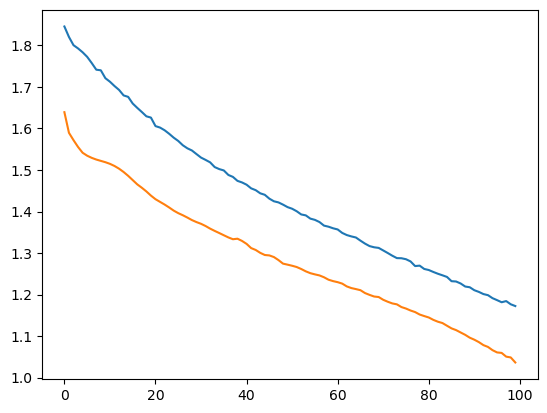

In [425]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

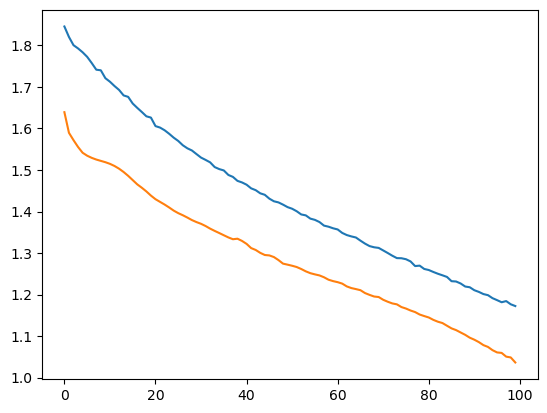

In [426]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [58]:
value = model.predict(test)

1595/1595 [==============================] - 5s 3ms/step


In [59]:
value

array([[0.50975937, 0.29508567, 0.19515498],
       [0.50973576, 0.29509747, 0.19516675],
       [0.5097453 , 0.2950927 , 0.195162  ],
       ...,
       [0.21702126, 0.6395674 , 0.14341131],
       [0.50975215, 0.29508924, 0.19515856],
       [0.1616748 , 0.68408316, 0.15424205]], dtype=float32)

In [60]:
import numpy as np

def mark_largest_indices(array):
    largest_indices = np.argmax(array, axis=1)
    
    return largest_indices
largest_indices = mark_largest_indices(value)
print(largest_indices)

[0 0 0 ... 1 0 1]


In [66]:
sample = pd.read_csv('sample_submission.csv')
sss = pd.read_csv('sample_submission.csv')

In [61]:
sample['Target'] = largest_indices
catmap = {0:'Graduate',1:'Dropout',2:'Enrolled'}
sample['Target'] = sample['Target'].map(catmap)
sample.to_csv('submission_new.csv',index = None)
sample

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate
...,...,...
51007,127525,Dropout
51008,127526,Graduate
51009,127527,Dropout
51010,127528,Graduate


In [65]:
sample['Target'].value_counts()

Graduate    49178
Dropout      1834
Name: Target, dtype: int64

In [68]:
sss['Target'].value_counts()

Graduate    51012
Name: Target, dtype: int64

In [73]:

total = len(sss)
num_graduate = total * 4 // 7
num_enrolled = total * 2 // 7
num_dropout = total - (num_graduate + num_enrolled)  # Remaining to fulfill the total count

# Create the target array
target_values = ['Graduate'] * num_graduate + ['Enrolled'] * num_enrolled + ['Dropout'] * num_dropout

# Shuffle the target values to ensure randomness
np.random.shuffle(target_values)

# Assign the shuffled target values back to the 'Target' column
sss['Target'] = target_values

# Save the modified sample submission to a new CSV file
# output_path = '/mnt/data/modified_sample_submission.csv'
sss.to_csv('data.csv',index = False)

